<p style="font-size:24pt;">
Econ 103: Introduction to Econometrics
</p>

Author: Lucas Zhang.

*Disclaimer: This notebook is intended as a template for students to get started on empirical exercises in the introductory econometrics class. The examples given will be using data from published research papers. As Python is an open-source all-purpose coding language, there are many different packages that serve the same purpose, and those contained in this notebook represent just one possibility. All the errors are mine.*

**Some Q&A's**

- **What is Jupyter Notebook?**

    - In short, for the purpose of this class, Jupyter Notebook is a user-interface (UI) that compiles the Python codes and presents the results in an user frendly and integrated manner.

- **Do I need to have prior experience with Python in order to do well in this class?**

    - Absolutely not. We will start from fresh and *keeps the coding part strictly to econometric analysis only*. 
    
    - That being said, you are not really learning how to code in Python in the traditional sense. We will simply explore one of the many possibilities of using Python.

    - If you want to learn proper coding in Python, you should take a dedicated course on that (or take advantage of many popular online courses/programs such as *DataCamp*). 

- **Is Python a commonly used language? What if I have to switch to a different statistical software such as R?**

    - Python is a fast growing and leading choice of coding language in statistical modeling and machine learning. For most part, the transition between R and Python should be very smooth (you *should* be able to pick up R in the matter of hours if you know Python already).



# A Starting Point

As an open-source language, Python has a huge number of packages dedicated to  written by professionals and amateurs. This is both a blessing and curse. How do we tell which ones are reliable or not? Luckily for us most of the packages we will be using are well-maintained and have stable releases, i.e. they have been "peer-reviewed" constantly updated to keep up with users' demands.

- Comments: Most of the packages are pre-installed in the cloud version of Jupyter Notebooks maintained by UCLA. If you have your own copy of Jupyter, check out the handouts on course website on how to install additional packages using Anaconda controller.

**As you will see, the first thing we do will be import all the packages we will be using:**

In [2]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as sp

**Comments**: In the above code cell, we import some most popular packages. Note that we didn't simply just import them, we also gave them easy "nicknames". You will see that these nicknames will make the coding considerably simpler.

**Comments**: Each of the packages serves its own purpose:
  - pandas: for manipulating data
  - numpy: for computing
  - matplotlib: for plotting
  - seaborn: for prettier plots
  - statsmodels: for statistical formulas
  - scipy: for scientific computing
  
For details, search them on Google (or your own choice of search engine) and they have their own dedidated pages.

# Load Data

Without further introduction, you need to load your data into the enviroment. If you have already uploaded the datasets to the jupyter, you can simply call them out using the following code:

In [3]:
df =  pd.read_csv('twin_cleaned.csv')

**Comments**: 

  - In the above code, `pd` is the nickname we gave to the package `pandas`, and `read_csv()` is a function that is included in the package `pandas`. 
  
  - The code `pd.read_csv()` simply calls out the `read_csv()` function from pandas. 
  
  - Inside the function `read_csv('data.csv')` is the actual data `data.csv` that was uploaded to the jupyter beforehand. the single quotation marks `'data.csv'` specifies the path/name of the data and makes it a "string", which is acceptable to the function `read_csv()`. 
  
  - If your data comes in other format, for example the excel formats "xls" or "xlsx", you should use `pd.read_excel('name of your data')`.
  
  - The code `df =` assigns the name "df" to the loaded dataset `data.csv`, and the name `df` will be used throughout to call this dataset

# Take a Look at the Data

Often times, especially when the datasets are large, you won't be able to know what the data looks like in advance. As a good habit, you want to take a look at the datasets once you have loaded it to the system.

In [4]:
df.head()

,first,educ,educt,hrwage,lwage,age,white,female,educt_t,age2,dlwage,deduc,deduct
0,1.0,16.0,16.0,11.935573,2.479523,33.251190,1,1,16.0,1105.64160,0.259346,0.0,0.0
1,NaN,16.0,16.0,9.208958,2.220177,33.251190,1,1,16.0,1105.64160,-0.259346,0.0,0.0
2,NaN,12.0,16.0,9.283223,2.228209,43.570145,1,1,12.0,1898.35750,-0.721318,-6.0,-4.0
3,1.0,18.0,12.0,19.096916,2.949527,43.570145,1,1,16.0,1898.35750,0.721318,6.0,4.0
4,NaN,12.0,12.0,15.447336,2.728481,30.983910,1,0,12.0,960.00262,-0.129809,0.0,0.0


**Comments**: 

  - `df` is our dataset
  - `.head()` following the `df` call out the names of the variables and the first five rows(observations) of the dataset.
  - `df.head()` if we leave the brackets `()` empty, it shows the first 5 rows; however, you can specify how many rows to show, for example, `df.head(10)` shows the first 10 rows.

Most likely, your data will come with many variables you won't use. Here's one way of choosing only the variables that you care. For example, I want a new dataset with only two variables: education (`educ`) and hourly wage(`hrwage`): 

In [5]:
df1 = df[['educ','hrwage']]
df1.head()

,educ,hrwage
0,16.0,11.935573
1,16.0,9.208958
2,12.0,9.283223
3,18.0,19.096916
4,12.0,15.447336


**Comments**:
  - `df` is our original dataset.
  - `['educ','hrwage']` creates a list of variable names that we are interested in
  - `df[['educ','hrwage']]` selects the only two variables, where the outer layer bracket `df[]` is needed for sectioning the data, while the inner layer bracket `['educ','hrwage']` is for the list of names.
  - we assign the name `df1` to the new dataset with `df1 = df[['educ','hrwage']]`

We can also select specific rows of data. For example, we want to create a dataset consists of only females:

In [6]:
df_f = df[df['female'] == 1]
df_f.head()

,first,educ,educt,hrwage,lwage,age,white,female,educt_t,age2,dlwage,deduc,deduct
0,1.0,16.0,16.0,11.935573,2.479523,33.251190,1,1,16.0,1105.6416,0.259346,0.0,0.0
1,NaN,16.0,16.0,9.208958,2.220177,33.251190,1,1,16.0,1105.6416,-0.259346,0.0,0.0
2,NaN,12.0,16.0,9.283223,2.228209,43.570145,1,1,12.0,1898.3575,-0.721318,-6.0,-4.0
3,1.0,18.0,12.0,19.096916,2.949527,43.570145,1,1,16.0,1898.3575,0.721318,6.0,4.0
8,NaN,15.0,13.0,8.094971,2.091243,34.978775,1,1,15.0,1223.5146,-1.523260,2.0,2.0


**Comments**:
  - In the code `df[df['female'] == 1]`:
    - the inner part `df['female'] == 1` conditions the data to be all the observations that has `female` equal to $1$.
    - once we put the condition `df['female'] == 1` inside `df[]`, it creates a new dataset that only contains obervations that has `female` equal to 1.
  - Then we assign a new name `df_f` to this dataset, which can be called on later.
  - Take a look at the first five rows of data, in the `female` colume, all the values equal to 1.

We also create a dataset that contains non-female observations only, call it `df_nf`

In [7]:
df_nf = df[df['female'] == 0]
df_nf.head()

,first,educ,educt,hrwage,lwage,age,white,female,educt_t,age2,dlwage,deduc,deduct
4,NaN,12.0,12.000000,15.447336,2.728481,30.983910,1,0,12.000000,960.00262,-0.129809,0.0,0.000000
5,1.0,12.0,12.000000,17.432159,2.858290,30.983910,1,0,12.000000,960.00262,0.129809,0.0,0.000000
6,NaN,14.0,14.000000,19.316584,2.887312,35.211269,1,0,14.333333,1239.83350,0.073764,0.0,0.333333
7,1.0,14.0,14.333333,16.698618,2.813548,35.211269,1,0,14.000000,1239.83350,-0.073764,0.0,-0.333333
10,NaN,14.0,15.000000,15.681567,2.752376,29.669403,1,0,14.000000,880.27350,-0.346573,1.0,-1.000000


# Summarize the Data

## Summary Statistics

The first few rows of data are far from representative of the entire dataset. We can take a look at the summary statistics of the variables.

In [8]:
np.mean(df1)

educ      14.030415
hrwage    14.436402
dtype: float64

In [9]:
np.mean(df1['educ'])

14.030415430267063

**Comments:**
  - The code `np.mean()` simply calls out the function `mean` from numpy `np`.
  - We need to specificy what we apply `np.mean()` to. If we want the mean of each variables in the dataset `df1`, simply put `df1` in the parentheses: `np.mean(df1)`.
  - If we want to find the mean of a specific variable `educ` in the dataset `df1`, we can do so by writing `df1['educ']`, and inside the bracket `['educ']` is the variable name we want.
  - Note that before when we created the datasets df1, we used the code `df1 = df[['educ','hrwage']]`, where there are two brackets, why do we only use one bracket in this case? The main difference being `df1['educ']` gives you a column of numbers, whereas ``df1[['educ']]`` gives you a new dataset with one variable and is indexed. Check out this nice example: https://stackoverflow.com/questions/50302180/difference-between-dfx-dfx-dfx-dfx-and-df-x. 

Here are some other functions in numpy `np` you can use:
  - `np.std()` to find the standard deviation
  - `np.median()` to find the median
  - `np.min()` to find the minimum
  - `np.max()` to find the maximum

In fact, numpy has many mathematical functions built in, such as sine/cosine, exponential, logarithm etc. You can find a partial list here https://numpy.org/doc/stable/reference/routines.math.html. As we mentioned, Python is open-sourced, so if you want to find some codes for specific uses, just search them and the chance is that someone already wrote them.

What if we want them altogether in one table? It's simple. One way to do this is using the affix/function `.describe()` after the dataset `df1`. See below:

In [10]:
df1.describe()

,educ,hrwage
count,674.000000,674.000000
mean,14.030415,14.436402
std,2.078159,13.050072
min,8.000000,2.059872
25%,12.000000,7.426579
50%,14.000000,11.443457
75%,16.000000,16.570554
max,18.000000,133.333330


What if we want to find the covariance between two variables `educ` and `hrwage`? Numpy also has a function for that

In [11]:
np.cov(df1['educ'],df1['hrwage'])

array([[  4.31874498,   8.32070508],
       [  8.32070508, 170.30438488]])

**Comments**:
  - `np.cov(x,y)` is a function that will return the **covariance matrix** of two variables $x$ and $y$. 
  - The values on the diagonal are the variances of each variables. For example, $4.31874498$ is the variance of variable `educ`, and $170.30438488$ is the variance of variable `hrwage`.
  - The values on the off-diagonal are the covariance. They are the same by definition. For example, $cov(educ,hrwage) = cov(hrwage,educ) = 8.32070508$.

## Histograms

In addition to the statistical summarization of the data, sometimes it's useful to have some visualization of the data. We start with a single variable. The first thing we do is to plot the histogram of that variable.

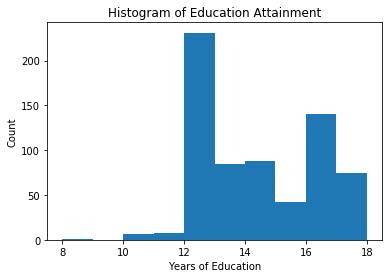

In [12]:
plt.hist(df1['educ'])
plt.title("Histogram of Education Attainment")
plt.xlabel("Years of Education")
plt.ylabel("Count")
plt.show()

**Comments**:
  - `plt` calls on the `matplotlib.pyplot`. It is the main library that we will be using for plots.
  - `plt.hist()` calls out the histogram function. Inside the parentheses `()`, the user has to specify for which variable they want to plot the histogram. In this case, we want the education variable `educ`, so we use `df1['educ']` as before.
  - `plt.title()` adds the title to the graph. Use the quotation mark so the function knows you are adding a name, not a variable.
  - `plt.xlabel()` adds a label to the x-axis
  - `plt.ylabel()` adds a label to the y-axis
  - `plt.show()` added in the end so the plot will actually show up
  - Try practice on your own to plot the histogram for hourly wage `hrwage`.
  
**Comments**:
  - What can we tell from the histogram? Most of the people in the sample has 12 or more years of education. The distribution of education seems to be bimodal: around high school graduates (12 years of education) and college graduates (16 years of educaiton).

## Scatter Plots

To visualize the relationship between two variables, we want to use **scatter plots**. That is, we will plot one variable against another.

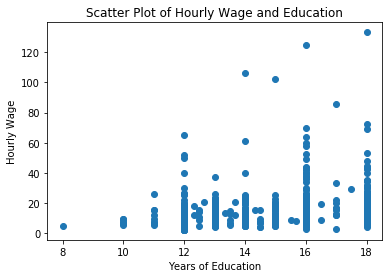

In [13]:
plt.scatter(df1['educ'], df1['hrwage'])
plt.title("Scatter Plot of Hourly Wage and Education")
plt.xlabel("Years of Education")
plt.ylabel("Hourly Wage")
plt.show()

**Comments**:
  - `plt.scatter(x,y)` calls out the scatter plot of x (horizontal axis variable) and y (vertical axis variable).
  - Inside the parentheses of `plt.scatter(df1['educ'], df1['hrwage'])`:
    - `df1['educ']` selects the variable `educ` from the dataset `df1`, and we put `df1['educ']` on the first position to indicate that we want this variable to be on the horizontal axis. 
    - Similarly, `df1['hrwage']` selects the variable `hrwage` from the dataset `df1`, and we put `df1['hrwage']` on the first position to indicate that we want this variable to be on the vertical axis.
  - `plt.title()` adds the title to the graph. Use the quotation mark so the function knows you are adding a name, not a variable.
  - `plt.xlabel()` adds a label to the x-axis
  - `plt.ylabel()` adds a label to the y-axis
  - `plt.show()` added in the end so the plot will actually show up
  

**Comments**:
  - It's a good habit to clearly label your graphs.
  - Each dot on the scatter plot represents one single data point in the sample: in our example, each data point represents that specific person's education level and hourly wage.
  - The scatter plots seems to indicate that higher educational level is associated with higher wage.

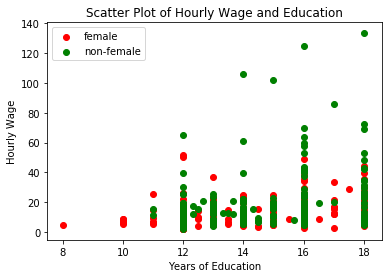

In [14]:
plt.scatter(df_f['educ'], df_f['hrwage'], label = "female", color = "red")
plt.scatter(df_nf['educ'], df_nf['hrwage'], label = "non-female", color = "green")
plt.title("Scatter Plot of Hourly Wage and Education")
plt.xlabel("Years of Education")
plt.ylabel("Hourly Wage")
plt.legend()
plt.show()

**Comments**:
  - You can get very creative with the graph. There are plenty of options for you to customize your graph.
  - In the above example, we create a scatter plot using the dataset with female only (`df_f`), and we overlay it with another scatter plot with non-female only (`df_nf`).
  - Inside the parentheses of `plt.scatter()`:
    - `label = "female"` will create a label `female` for this scatter plot
    - `color = "red"` will make the dots red color, which you can change to many other colors
  - The code `plt.legend()` will show the labels for each scatter plot, so we know which plot is which.
  - What does this graph tell you?

# Simple Linear Regression with One Variable 

In lecture, we have seen how the theory for simple linear regression works. How do we do it in Python?

## Regression Output
There are many libraries that deal with regression analysis. We will use `statsmodels.formula`, as it is a well maintained package and very intuitive to use. Recall that we imported this package as `smf`.

In this section, we are going to regress hourly wage `hrwage` on educational level `educ`:

$$ \text{hourly wage} = \beta_0 + \beta_1 \text{educ} + \text{residual}$$

and the code is as following:

In [15]:
model = smf.ols(formula = 'hrwage ~ educ', data=df)
results = model.fit(cov_type = 'HC1')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 hrwage   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     48.64
Date:                Sun, 02 Aug 2020   Prob (F-statistic):           7.36e-12
Time:                        13:59:53   Log-Likelihood:                -2653.9
No. Observations:                 674   AIC:                             5312.
Df Residuals:                     672   BIC:                             5321.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.5953      3.597     -3.501      0.0

**Comments**:

  - Since we are running the OLS regression, so we call out the OLS function`ols()` from the package `smf` with the code `smf.ols()`;
  
  
  - Inside the parenthses of `smf.ols(formula = 'hrwage ~ educ', data=df)`:
  
    - `formula = 'hrwage~educ'` specifies the regression formula. The variable `hrwage` is the dependent variable, and `educ` is the regressor. `~` is used to separate the twosides of the regression. The constant is automatically included. The formula needs to be in quotation marks.
    
    - `data = df` tells the formula which dataset are we using.
    
    
  - Then, we asign the name `model` to the output of the function `smf.ols(formula = 'hrwage ~ educ', data=df)`. You can name the output however you like though. The `model` contains all the information from the regression.
  
  
  - The `model` can't be called on by itself. We have to summarize the model fit using function `.fit()` to get a summary of the model outputs, such as the standard errors or the fitted values. 
  
  
  - We assign the name `results` to the fitted model `results = model.fit(cov_type = 'HC1')`:
  
    - If the parentheses in `model.fit()` is left blank, the standard errors on the OLS estimates are **homoskedastic** by default.
    
    - To have heteroskedasticity robust standard errors, we need to write `cov_type = 'HC1'` inside the `model.fit()`. Don't worry about the name HC1. Just memorize it as the synonym of "hetoroskedasticity consistent" for now.
    
   
  - To see the regression table, we first assign the function `.summary()` to the `results`, then we print the results using `print(results.summary())`. As you can see from the table, it contains all you need to know from the regression.

**What information are summarized in the table?**


  - number of observations
  
  
  - $R^2$ and adjusted-$R^2$
  
  
  - The `coef` column contains the estimated regression coefficients. For example, the estimated coefficient on `intercept` is $\hat\beta_0$, the coefficient on `educ` is $\hat\beta_1$.
  
  
  - The `std err` column contains the standard error of the estimates of regression coefficients, namely, $SE(\hat\beta_0)$ and $SE(\hat\beta_1)$
  
  
  - The `z` column calculates the t-statistic under two-sided null hypothesis that the true coefficient $\beta_j = 0$, for $j=0,1$. For example, the `z` for the estimated coefficent $\hat\beta_1$ on `educ` is calculated by
  $$ \frac{\hat\beta_1 - \beta_1}{SE(\hat\beta_1)} = \frac{\hat\beta_1 - 0}{SE(\hat\beta_1)} = \frac{ 1.9266}{0.276} =  6.974$$
  the letter `z` is used to reference that here the t-statistic has an approximately standard normal distribution, which we usually use $Z$ as the letter for $N(0,1)$. 
  
  
  - The `P>|z|` column calculates the p-value for the two-sided hypothesis. Recall that p-value is defined as the probability, under the null, of drawing another test-statistic that is at least as adverse to the null as the computed test-statistic value.
    - in this example, we reject can reject the null that $\beta_1 =0$ at $1\%$ significance level since the p-value on $\hat\beta_1$ is practically 0. (recall that we reject the null if the p-value is less than the significance level)
    
  
  - The last column `[0.025 0.975]` contains the lower and upper values of the $95\%$ confidence intervals for the estimated coefficients.

## Interpretation of Regression Output

Recall our regression output is

\begin{align*}
\widehat{\text{hrwage}} &= -12.5953 + 1.9266\times \text{educ}\\
&\quad\quad(3.597)\quad(0.276)\\
\end{align*}

where in the above expression, the value inside parentheses under each coefficient is the standard error of that coefficient. `hrwage` is the hourly wage and `educ` is the years of education.


  - How to interpret the coefficient on `educ`?
  
    - on average, one additional year of education is associated with $\$1.9266$ increase on hourly wage.
    
  
  - What's the t-statistic on the coefficient on `educ` for $H_0: \beta_1 = 0$ vs. $H_1:\beta_1\neq 0$?
  
  $$
   \hat{t} = \frac{\hat\beta_1 - \beta_1}{SE(\hat\beta_1)} = \frac{\hat\beta_1 - 0}{SE(\hat\beta_1)} = \frac{ 1.9266}{0.276} =  6.974
  $$
  
  
  - Do you reject $H_0$ at $5\%$ significance level? The critical value $z_{0.025} = 1.96$
    - Yes. We reject $H_0$ if $\hat{t}>z_{0.025}$ or $\hat{t} < -z_{0.025}$
    
    
  - What's 95\% confidence interval for $\beta_1$?
    - we can either read that off the regression table: $[1.385,2.468]$
    - or calculate it by hand:
    \begin{align*}
    &[\hat{\beta}_1 - 1.96*SE(\hat\beta_1),\hat{\beta}_1 + 1.96*SE(\hat\beta_1)]\\
    \iff & [1.9266 - 1.96*0.276, 1.9266 + 1.96*0.276]\\
    \iff & [1.385,2.468]
    \end{align*}
    which is the same result as in the table.

## Plot the Regression Line

In the previous section, we have created a scatter plot on hourly wage and years of education. Now we are going to fit a regression line in the scatter plot. There are many different ways of plotting the regression line. Here we give you two possible ways:
 
  - The first way is to use a very powerful library called `seaborn`, which we imported under the nickname `sns`. Check out the trove of beautiful plots the `seaborn` library can create: https://seaborn.pydata.org/examples/index.html
  
  
  - The second way is to do it by "hand", which is a bit more cumbersome, but you do see what's behind the scene.

### Use Seaborn Library

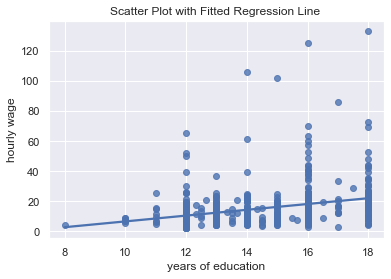

In [16]:
sns.set()
sns.regplot(x="educ", y="hrwage", ci= None, data=df)
plt.xlabel('years of education')
plt.ylabel('hourly wage')
plt.title('Scatter Plot with Fitted Regression Line ')
plt.show()

**Comments**
  - `sns.set()` sets the graph style to those come with the library `seaborn`. It's entirely optional.
  
  
  - In the code `sns.regplot(x="educ", y="hrwage", ci= None, data=df)`:
  
    - `sns` is calling on the library `seaborn`, and `sns` is the nickname we gave when we loaded the libraries.
    - `sns.regplot()` is calling the function `regplot()` that comes with the seaborn. 
    - Inside the parentheses of `regplot()`:
    
       - `x="educ"` specifies the variable on the x-axis
       
       - `y="hrwage"` specifies the variable on the y-axis
       
       - `ci = None` to indicate that we don't want the confidence bands around the regression line
       
       - `data = df` to indicate `df` is the dataset we are using

### Do It Yourself

In [17]:
results.params

Intercept   -12.595282
educ          1.926649
dtype: float64

**Comments**: 

  - Recall that `results` is the final object from our regression code. It contains all the information of that regression.
  
  - `results` has many attributes. For example, you have seen the `results.summary()`, which will give a summary of the regression results. In fact, any attributes of `results` can be called out individually.
  
  - `results.params` calls out the coefficients/parameters on the intercept and on the regressor, as you can see from above output.

In [18]:
b0, b1 = results.params

**Comments**:
  - We assign values of the parameters to two user-chosen names.
  - Above code does it in one step:
    - `results.params` has two outputs: intercept and regression coefficient on `educ`, aka slope.
    - `b0, b1 = results.params`, in the order of elements in `results.params`,    
      - assigns the intercept value to name `b0`
      - assigns the coefficient on `educ` to name `b1` .
  - You can also do this separately using the following code: `b0 = results.params[0]` and `b1 = results.params[1]`
    - **be careful: python counts starting from 0**
    - `results.params[0]` gives the first value of `results.params` 
    - `results.params[1]` gives the second value of `results.params`

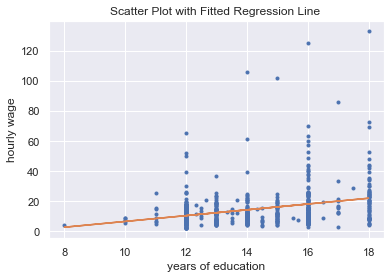

In [19]:
plt.plot(df['educ'], df['hrwage'], '.')
plt.plot(df['educ'], b0 + b1*df['educ'],'-')
plt.xlabel('years of education')
plt.ylabel('hourly wage')
plt.title('Scatter Plot with Fitted Regression Line ')
plt.show()

**Comments**:

  - `plt.plot()` calls the `plot()` function from matplotlib library `plt`.
  
  
  - In the arguments in `plt.plot(df['educ'], df['hrwage'], '.')`:
    - The first argument `df['educ']` specifies that the x-axis variable is `educ` from dataset `df`.
    - The second argument `df['hrwage']` specifies that the y-axis variable is `hrwage` from dataset `df`.
    - The third argument `'.'` specifies that type of the plot, in this case, the "dot".
    - Together, these creates the scatter plot.
    
    
  - In the arguments in `plt.plot(df['educ'], b0 + b1*df['educ'],'-')`:
    - The first argument `df['educ']` specifies that the x-axis variable is `educ` from dataset `df`.
    - The second argument `b0 + b1*df['educ']` specifies that the y-axis variable is the regression line that we are plotting:
      - `b0` is the intercept and `b1` is the slope that we specified before.
    - The third argument `'-'` specifies that type of the plot, in this case, the "line".
    - Together, these creates the regression line.

## Plot the Residuals

In [20]:
results.resid

0     -6.295527
1     -9.022142
2     -1.241281
3     -2.987481
4      4.922832
         ...   
669   -8.841126
670   -4.884505
671   -2.734504
672    0.618794
673   -4.324504
Length: 674, dtype: float64

**Comments**: 

  - Recall that `results` is the final object from our regression code. It contains all the information of that regression.
  
  - As we mentioned before, `results` has many attributes. You have seen `results.summary()` and `results.params` that gives the summary of the regression and the regression coefficients respectively.
  
  - Similarly, the `results` also stored all the residuals from the regression. `results.resid` calls out the residuals, as you can see from above output.

In [21]:
df['resid'] = results.resid
df.head()

,first,educ,educt,hrwage,lwage,age,white,female,educt_t,age2,dlwage,deduc,deduct,resid
0,1.0,16.0,16.0,11.935573,2.479523,33.251190,1,1,16.0,1105.64160,0.259346,0.0,0.0,-6.295527
1,NaN,16.0,16.0,9.208958,2.220177,33.251190,1,1,16.0,1105.64160,-0.259346,0.0,0.0,-9.022142
2,NaN,12.0,16.0,9.283223,2.228209,43.570145,1,1,12.0,1898.35750,-0.721318,-6.0,-4.0,-1.241281
3,1.0,18.0,12.0,19.096916,2.949527,43.570145,1,1,16.0,1898.35750,0.721318,6.0,4.0,-2.987481
4,NaN,12.0,12.0,15.447336,2.728481,30.983910,1,0,12.0,960.00262,-0.129809,0.0,0.0,4.922832


**Comments**:

  - We want to create a new column named `resid` in our dataset `df`.
  - Recall that `results.resid` gives all the residuals from the regression. 
  - In the code :
    - `df['resid']` asks python to add a column named `resid` to dataset `df`
    - then we have to assign the values from `results.resid` to this new column by setting `df['resid'] = results.resid`
  - Take a look at the head of the dataset `df`: now `resid` is the last column in the dataset


Below is the standard code for create the scatter plot that we have seen beofre. Are the residuals homoskedastic or heteroskedastic?

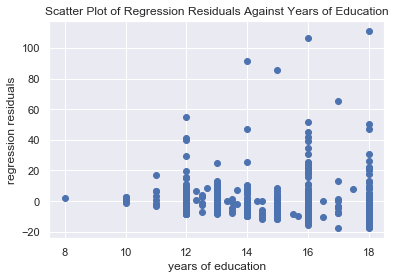

In [22]:
plt.scatter(df['educ'], df['resid'])
plt.xlabel('years of education')
plt.ylabel('regression residuals')
plt.title('Scatter Plot of Regression Residuals Against Years of Education')
plt.show()

# Regression with Multiple Regressors

Recall our regression model

$$
Y_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \cdots + \beta_k X_{ki} + u_i
$$

As the explicit formula for OLS estimators of $\beta_0,\beta_1,\cdots,\beta_k$ are complicated, in practice, we rely on the statistical softwares. In this section, we are going to extend our previous codes to multiple regression setting.


## Additional Regressors

We will continue use our original dataset. Are there any other factors other than education that are associated with wage? We start by considering adding regressor `age` to the model

In [23]:
model2 = smf.ols(formula = "hrwage ~ educ + age", data = df)
results2 = model2.fit(cov_type = 'HC1')
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                 hrwage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     28.31
Date:                Sun, 02 Aug 2020   Prob (F-statistic):           1.57e-12
Time:                        13:59:53   Log-Likelihood:                -2626.6
No. Observations:                 674   AIC:                             5259.
Df Residuals:                     671   BIC:                             5273.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.9905      5.497     -5.092      0.0

**Comments**:
  - The code is almost identical to the simple regression case.
  - `smf.ols()` calls the `ols()` function from library `statsmodels.formula` which we nicknamed as `smf`.
  - In side the parentheses of `smf.ols(formula = "hrwage ~ educ + age", data = df)`:
    - we first specify the regression formula: `formula = "hrwage ~ educ + age"`:
      - the dependent variable is `hrwage`
      - the regressors are `educ` and `age`
      - they are separated by `~`.
      - the constant is automatically included.
      - the fomula has to be in quotation marks `" "`
  - Then we have to specify what dataset we are using `data = df`.


The interpretation of the regression table is exactly the same as in the simple regression case. Refer to section 5.1 for details.

### Adding Binary Regressor

The variable `female` is a binary variable:

  - `female = 1` if the respondent is female, `female = 0` for otherwise
  
We include can include this binary variable in the regression as well:

Bonus Question: How would you interterpret the regression coefficient on `female`?

In [24]:
model3 = smf.ols(formula = "hrwage ~ educ + age + female", data = df)
results3 = model3.fit(cov_type = 'HC1')
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                 hrwage   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     21.54
Date:                Sun, 02 Aug 2020   Prob (F-statistic):           2.51e-13
Time:                        13:59:54   Log-Likelihood:                -2608.4
No. Observations:                 674   AIC:                             5225.
Df Residuals:                     670   BIC:                             5243.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.4813      4.963     -4.530      0.0

## Transformation of Dependent Variable and Regressors

In this section, we are going to take a look at how to transform the regressors in the regression. There are two ways:

  1. edit data directly, which you have seen when we add the residuals to the dataset;
  
  2. modify the regression formula. (Won't discussed in this class)
  
The first method is foolproof, and we will focus on that. The second method is elective.

### Add Transformed Variables to the Dataset

(1) Suppose we want to add natural log of wage to the dataset:

In [25]:
df['logwage'] = np.log(df['hrwage'])
df.head()

,first,educ,educt,hrwage,lwage,age,white,female,educt_t,age2,dlwage,deduc,deduct,resid,logwage
0,1.0,16.0,16.0,11.935573,2.479523,33.251190,1,1,16.0,1105.64160,0.259346,0.0,0.0,-6.295527,2.479523
1,NaN,16.0,16.0,9.208958,2.220177,33.251190,1,1,16.0,1105.64160,-0.259346,0.0,0.0,-9.022142,2.220177
2,NaN,12.0,16.0,9.283223,2.228209,43.570145,1,1,12.0,1898.35750,-0.721318,-6.0,-4.0,-1.241281,2.228209
3,1.0,18.0,12.0,19.096916,2.949527,43.570145,1,1,16.0,1898.35750,0.721318,6.0,4.0,-2.987481,2.949527
4,NaN,12.0,12.0,15.447336,2.728481,30.983910,1,0,12.0,960.00262,-0.129809,0.0,0.0,4.922832,2.737437


**Comments**:
  - We want to create a new variable named `logwage` in our dataset `df`.
  - In the code :
  
    - `df['logwage']` asks python to add a column named `logwage` to dataset `df`
    
    - In `np.log(df['hrwage'])`
      - `np.log()` is the natural log function from package `np`. This function can be applied to either a single number, or a vector of numbers.
      - Inside the parentheses, we input the object we want to take log, in this case, the `df['hrwage']`
      - `np.log(df['hrwage'])` will then create a new column of natural log of hourly wage.
      
    - then we assign the values to this new column by setting `df['resid'] = results.resid`
    
  - Take a look at the head of the dataset `df`: now `logwage` is the last column in the dataset that consists the natural log of hourly wage.

(2) Suppose we want to create a new variable, "potential experience", which is defined as

$$ \text{potential experience} = \text{age} - \text{years of education} - 7 $$

Let's create the variable, potential experience, and name it `pexp`

In [26]:
df['pexp'] = df['age'] - df['educ'] - 7
df.head()

,first,educ,educt,hrwage,lwage,age,white,female,educt_t,age2,dlwage,deduc,deduct,resid,logwage,pexp
0,1.0,16.0,16.0,11.935573,2.479523,33.251190,1,1,16.0,1105.64160,0.259346,0.0,0.0,-6.295527,2.479523,10.251190
1,NaN,16.0,16.0,9.208958,2.220177,33.251190,1,1,16.0,1105.64160,-0.259346,0.0,0.0,-9.022142,2.220177,10.251190
2,NaN,12.0,16.0,9.283223,2.228209,43.570145,1,1,12.0,1898.35750,-0.721318,-6.0,-4.0,-1.241281,2.228209,24.570145
3,1.0,18.0,12.0,19.096916,2.949527,43.570145,1,1,16.0,1898.35750,0.721318,6.0,4.0,-2.987481,2.949527,18.570145
4,NaN,12.0,12.0,15.447336,2.728481,30.983910,1,0,12.0,960.00262,-0.129809,0.0,0.0,4.922832,2.737437,11.983910


**Comments**:
  - as before, `df['pexp']` asks python to add a column named `pexp` to dataset `df`
  - the rest is just simple mathematical operation.
  
**Commonly Used Arithmic Operations**:
  - $x+y$ will be coded exactly as `x+y`
  - $x-y$ will be coded exactly as `x-y`
  - $x\times y$ will be coded as `x*y`, where the sigle star `*` is the multiplication sign
  - $\frac{x}{y}$ will be coded as `x/y`
  - $x^y$ will be coded as `x**y`, where the double star `**` is the power operation
  
Let's create another variable, squared potential experience, and let's name it `pexp2`

In [27]:
df['pexp2'] = df['pexp']**2
df.head()

,first,educ,educt,hrwage,lwage,age,white,female,educt_t,age2,dlwage,deduc,deduct,resid,logwage,pexp,pexp2
0,1.0,16.0,16.0,11.935573,2.479523,33.251190,1,1,16.0,1105.64160,0.259346,0.0,0.0,-6.295527,2.479523,10.251190,105.086896
1,NaN,16.0,16.0,9.208958,2.220177,33.251190,1,1,16.0,1105.64160,-0.259346,0.0,0.0,-9.022142,2.220177,10.251190,105.086896
2,NaN,12.0,16.0,9.283223,2.228209,43.570145,1,1,12.0,1898.35750,-0.721318,-6.0,-4.0,-1.241281,2.228209,24.570145,603.692025
3,1.0,18.0,12.0,19.096916,2.949527,43.570145,1,1,16.0,1898.35750,0.721318,6.0,4.0,-2.987481,2.949527,18.570145,344.850285
4,NaN,12.0,12.0,15.447336,2.728481,30.983910,1,0,12.0,960.00262,-0.129809,0.0,0.0,4.922832,2.737437,11.983910,143.614099


### Mincer Regression

In labor economics, the most famous equation is the so called "Mincer equation", which explains the wage as a function of education and experience. It is specified as following:

$$ \text{log wage} = \beta_0 + \beta_1\text{education} + \beta_2\text{potential experience} + \beta_3(\text{potential experience})^2 + \text{residual} $$

Let's use our transformed variables from previous section to run the Mincer regression.

In [28]:
mincer = smf.ols(formula = "logwage ~ educ + pexp + pexp2", data = df)
resultsm = mincer.fit(cov_type = 'HC1')
print(resultsm.summary())

                            OLS Regression Results                            
Dep. Variable:                logwage   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     74.50
Date:                Sun, 02 Aug 2020   Prob (F-statistic):           1.36e-41
Time:                        13:59:54   Log-Likelihood:                -526.84
No. Observations:                 674   AIC:                             1062.
Df Residuals:                     670   BIC:                             1080.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0870      0.181     -0.482      0.6

Bonus Questions:
  - How would you interpret the coefficient on educ?
  - How would you interpret the relationship between potential experience and log earning?

## Interaction Between Regressors

In lecture, we have seen that we can include the interaction terms to allow difference in intercepts and difference in slopes in the regression for different groups. How do we do this in practice?

  - Create new variables and add that to the dataset. This method always works and the codes are similar to those in section 6.2.
  
  - Alternatively, we can do this directly in the formula in `smf.ols`. Below we will show you both and you will see that they are indeed equivalent. 
  
To best illustrate this, we will conduct a case study on gender-wage differential.

**Gender-Wage Differentials**

We will run the following regression specification:

$$\text{hourly wage} = \beta_0 + \beta_1\text{educ} + \beta_2\text{female} + \beta_3(\text{educ}\times\text{female}) + \text{residual} $$

### Using direct method

First, let's start with the direct method by creating the interaction term as a new variable, which we name as `educ_f`.

In [29]:
df['educ_f'] = df['educ']*df['female']
df.head()

,first,educ,educt,hrwage,lwage,age,white,female,educt_t,age2,dlwage,deduc,deduct,resid,logwage,pexp,pexp2,educ_f
0,1.0,16.0,16.0,11.935573,2.479523,33.251190,1,1,16.0,1105.64160,0.259346,0.0,0.0,-6.295527,2.479523,10.251190,105.086896,16.0
1,NaN,16.0,16.0,9.208958,2.220177,33.251190,1,1,16.0,1105.64160,-0.259346,0.0,0.0,-9.022142,2.220177,10.251190,105.086896,16.0
2,NaN,12.0,16.0,9.283223,2.228209,43.570145,1,1,12.0,1898.35750,-0.721318,-6.0,-4.0,-1.241281,2.228209,24.570145,603.692025,12.0
3,1.0,18.0,12.0,19.096916,2.949527,43.570145,1,1,16.0,1898.35750,0.721318,6.0,4.0,-2.987481,2.949527,18.570145,344.850285,18.0
4,NaN,12.0,12.0,15.447336,2.728481,30.983910,1,0,12.0,960.00262,-0.129809,0.0,0.0,4.922832,2.737437,11.983910,143.614099,0.0


In [30]:
model_f1 = smf.ols(formula = "hrwage ~ educ + female + educ_f", data = df)
results_f1 = model_f1.fit(cov_type = 'HC1')
print(results_f1.summary())

                            OLS Regression Results                            
Dep. Variable:                 hrwage   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     29.80
Date:                Sun, 02 Aug 2020   Prob (F-statistic):           4.28e-18
Time:                        13:59:54   Log-Likelihood:                -2630.6
No. Observations:                 674   AIC:                             5269.
Df Residuals:                     670   BIC:                             5287.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.6312      7.473     -2.493      0.0

**Comments**:
  - First, we created the interaction term as the new variable just as before:
    - `df['educ_f']` asks python to add a column named `educ_f` to dataset `df`;
    - `df['educ']*df['female']` creates a new list of values by multiplies these two columns element by element;
    - then we assign the created values to this new column by setting `df['educ_f'] = df['educ']*df['female']` 
    
  - Second, we run the regression as usual and include `educ_f` as a new variable in the regression.

### Using the package option

Second, we use the option provided by the function `smf.ols()`:

In [31]:
model_f2 = smf.ols(formula = "hrwage ~ educ + female + educ:female", data = df)
results_f2 = model_f2.fit(cov_type = 'HC1')
print(results_f2.summary())

                            OLS Regression Results                            
Dep. Variable:                 hrwage   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     29.80
Date:                Sun, 02 Aug 2020   Prob (F-statistic):           4.28e-18
Time:                        13:59:54   Log-Likelihood:                -2630.6
No. Observations:                 674   AIC:                             5269.
Df Residuals:                     670   BIC:                             5287.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -18.6312      7.473     -2.493      

**Comments**:
  - In the codes above `smf.ols(formula = "hrwage ~ educ + female + educ:female", data = df)`:
    - We didn't create a new variable in the dataset.
    - Notice that inside the formula, we include the term `educ:female`. The colon symbol `:` in the formula serves as the multiplication.

Compare the regression outputs from these two methods, they are entirely equivalent.

**Bonus Question**: How would you interpret the regression coefficient on the interaction term?

### Visualization

We can also visualize this in a single plot:

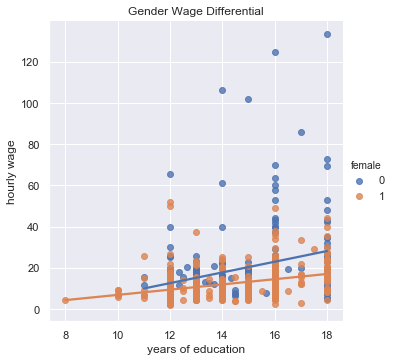

In [32]:
sns.lmplot(x="educ", y="hrwage", hue = "female", ci= None, data=df)
plt.xlabel('years of education')
plt.ylabel('hourly wage')
plt.title('Gender Wage Differential')
plt.show()

 - In the code `sns.lmplot(x="educ", y="hrwage", hue="female", ci= None, data=df)`:
  
    - `sns` is calling on the library `seaborn`, and `sns` is the nickname we gave when we loaded the libraries.
    - `sns.lmplot()` is calling the function `lmplot()` that comes with the seaborn. 
    - Inside the parentheses of `lmplot()`:
    
       - `x="educ"` specifies the variable on the x-axis
       
       - `y="hrwage"` specifies the variable on the y-axis
       
       - `hue = "female"` asks the python to creates separate plot based on the value of the variable `female`
       
       - `ci = None` to indicate that we don't want the confidence bands around the regression line
       
       - `data = df` to indicate `df` is the dataset we are using
       
Does the graph match the regression results?

## Joint Hypothesis Testing

Recall our regression model

$$
Y_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \cdots + \beta_k X_{ki} + u_i
$$

and we are interested in testing joint hypotheses, for example:

  - $ H_0: \beta_0 = \beta_1 = \beta_2 = \cdots = \beta_k = 0 $  vs.  $ H_1:~\text{at least one of the}~\beta_j\neq 0$
  
  - $ H_0: \beta_2 = \beta_3 $  vs.  $H_1: \beta_2 \neq\beta_3$
  
  - $ H_0: \beta_1 = 2, \beta_2 = 3, \beta_3 = 5 $  vs. $H_1:~\text{at least one of the contraint in null is false}$
  
How do we test hypothesis like this in Python? Luckily we have a well written package from stats models. We made up an example below to show you how to test such hypothesis.

Suppose we want to run the following specification:

$$
\text{log wage} = \beta_0 + \beta_1 \text{educ} + \beta_2 \text{potential experience} + \beta_3 (\text{potential experience})^2 + \beta_4 \text{female} + \beta_5 \text{white}  + \text{residual}
$$

and we want to test the hypotheses: $H_0: \beta_1 = 0, \beta_2 = 2, \beta_4 = \beta_5$  vs.  $H_1:~\text{at least one of the contraint in null is false}$.


In [33]:
model_f = smf.ols(formula = "logwage ~ educ + pexp + pexp2 + female + white", data = df)
results_f = model_f.fit(cov_type = 'HC1')
hypotheses = '(educ = 0), (pexp = 2), (female = white)'
ftest = results_f.f_test(hypotheses)
print(ftest)

<F test: F=array([[42246.69900786]]), p=0.0, df_denom=668, df_num=3>


**Comments**:
  - The first two lines of the code is the standard multiple regression code:  
     - Recall that `results_f` is the name we assign to the final object from our regression code. It contains all the information of that regression. 
    - As we mentioned before, `results_f` has many attributes. You have seen `results.summary()`, `results.params`, and `results.resid` that give the summary of the regression, the regression coefficients, and the regression residuals respectively.  
    - Similarly, the `results_f` has the function `f_test`, which will serve the exact purpose of testing joint hypotheses.


  - In the line `hypotheses = '(educ = 0), (pexp = 2), (female = white)'`, we specify our null hypotheses:
    - `(educ = 0)` means the coefficient on `educ` is $0$, i.e. $\beta_1 = 0$
    - `(pexp = 2)` means the coefficient on `pexp` is $2$, i.e. $\beta_2 = 2$
    - `(female = white)` means the coefficient on `female` and coefficient on `white` are the same, i.e. $\beta_4=\beta_5$
    - Together, we separate them by coma `,`, put them in quotation `' '`, and asign this to the name `hypotheses`. 


  - In the line `ftest = results_f.f_test(hypotheses)`:
    - we feed the `hypotheses` we just created to the function `results_f.f_test()`
    - This will generate the f-test on the null hypotheses, and we store that results to the name `ftest`


  - In the line `print(ftest)`
    - we print the result of the f-test. You should focus on the `p`, which is the p-value.
    - We reject the null hypothesis if the p-value is smaller than the significance level. For example, if the significance level is given as 1%, you would reject null at 1% significance level since p = 0 < 1%.

### White Test for Heteroskedasticity

Suppose we want to do a White test for heteroskedasticity for the following regression:

$$
\text{log wage}_i = \beta_0 + \beta_1 \text{educ}_i + \beta_2 \text{potential experience}_i  + u_i
$$


Step 1: Run the main regression, and save squared residuals

In [34]:
model_w = smf.ols(formula = "logwage ~ educ + pexp", data = df)
results_w = model_w.fit(cov_type = 'HC1')
df['resid2'] = (results_w.resid)**2
df.head()

,first,educ,educt,hrwage,lwage,age,white,female,educt_t,age2,dlwage,deduc,deduct,resid,logwage,pexp,pexp2,educ_f,resid2
0,1.0,16.0,16.0,11.935573,2.479523,33.251190,1,1,16.0,1105.64160,0.259346,0.0,0.0,-6.295527,2.479523,10.251190,105.086896,16.0,0.013168
1,NaN,16.0,16.0,9.208958,2.220177,33.251190,1,1,16.0,1105.64160,-0.259346,0.0,0.0,-9.022142,2.220177,10.251190,105.086896,16.0,0.139950
2,NaN,12.0,16.0,9.283223,2.228209,43.570145,1,1,12.0,1898.35750,-0.721318,-6.0,-4.0,-1.241281,2.228209,24.570145,603.692025,12.0,0.005237
3,1.0,18.0,12.0,19.096916,2.949527,43.570145,1,1,16.0,1898.35750,0.721318,6.0,4.0,-2.987481,2.949527,18.570145,344.850285,18.0,0.003508
4,NaN,12.0,12.0,15.447336,2.728481,30.983910,1,0,12.0,960.00262,-0.129809,0.0,0.0,4.922832,2.737437,11.983910,143.614099,0.0,0.428348


**Comments**:
  - The first two lines of codes are standard for multiple regression, which we have seen many times
  - the third line creates a new column `resid2` in the dataset `df`, whose values are squared residuals from the regression
    - in the code `(results_w.resid)**2`:
      - `results_w.resid` is a column of all the residuals from the regression
      - `**2` squares the values in `results_w.resid` 

Step 2: Run the auxiliary regression

$$
u^2_i = \alpha_0 + \alpha_1 \text{educ}_i + \alpha_2 \text{potential experience}_i + \alpha_3\text{educ}^2_i  +  \alpha_4 \text{potential experience}^2_i + \alpha_5 (\text{potential experience}_i\times \text{educ}_i) + e_i
$$

That is regress the squared residual on the regressors from the main regression, the squared regressors, and interaction of the regressors.

We want to do a F-test on the null hypothesis that $H_0: \alpha_1 = \alpha_2 = ... =  \alpha_5 = 0 $. If the null is rejected, we conclude that the heteroskedasticity is present.

In [35]:
df['educ2'] = (df['educ'])**2
df['pexp_educ'] = (df['pexp'])*(df['educ'])
model_aux = smf.ols(formula = "resid2 ~ educ + pexp + educ2 + pexp2 + pexp_educ", data = df)
results_aux = model_aux.fit(cov_type = 'HC1')
hypotheses = '(educ = 0), (pexp = 0), (educ2=0), (pexp2=0), (pexp_educ=0)'
ftest = results_aux.f_test(hypotheses)
print(ftest)

<F test: F=array([[3.41338605]]), p=0.004712653753891873, df_denom=668, df_num=5>


**Comments**:

  - `df['educ2'] = (df['educ'])**2` creates a new column of squared `educ` in the dataset `df`
  - `df['pexp_educ'] = (df['pexp'])*(df['educ'])` creates a new column of interaction of `educ` and `pexp` in the dataset `df`
  - `hypotheses = '(educ = 0), (pexp = 0), (educ2=0), (pexp2=0), (pexp_educ=0)'` specifies the null hypothesis that $H_0: \alpha_1 = \alpha_2 = ... =  \alpha_5 = 0 $.
  - `ftest = results_aux.f_test(hypotheses)` conducts the f-test on the hypothesis specified.
  - `print(ftest)` prints the results of the f-test.

From the results of F-test, we see that the p-value $p = 0.004$, which is less than $1\%$, so we can reject the null at $1\%$ significance level, and conclude that the heteroskedasticity is present.

## Difference in Differences 

### Card and Krueger 1994 (Minimum Wage)

In their famous 1994 minimum wage study, Card and Krueger compared the employment rates in fastfood restaurants in New Jersey and Pennsylvania before and after a minimum wage increase in New Jersey (while there's no such change in Penn). Their results suggest that, contrary to the predicition of the textbook model on minimum wage, the exogenous increase in minimum wage did not reduce the employment. Below, we are going to "replicate" this study using their original dataset, modified for simplicity.  

In the `did` dataset:

  - `d` is a binary variable such that: `d = 0` if before New Jersey minimum wage increase, and `d = 1` if after New Jersey minimum wage increase.
  
  - `nj` is a binary variable such that: `nj = 1` if the respondent is in New Jersey, and `nj = 0` if in Penn
  
  - `fte` is the "full-time equivalent employment"
  
  - `d_nj` is the interaction variable `d * nj`
  
We run the baseline regression

$$ \text{fte}_i = \beta_0 + \beta_1 \text{d}_i + \beta_2 \text{nj}_i + \beta_3\text{d_nj}_i + u_i$$

As we showed in lecture, $\beta_3$ is the treatment effect. The we can also include control variables in the DiD model. In the data, we have the following binary variables as controls

  - bk           = 1 if burger king
  - kfc          = 1 if kentucky fried chicken
  - roys         = 1 if roy rodgers
  - wendys       = 1 if wendys
  - co_owned     = 1 if company owned
  - centralj     = 1 if in central nj
  - southj       = 1 if in southern nj
  - pa1          = 1 if in pa, northeast suburbs of phila
  - pa2          = 1 if in pa, easton etc
  
Note that each fast food restaurant can only belong to one location (centralj, southj, pa1, pa2) and one brand (bk, kfc, roys, wendys) 

In [36]:
did = pd.read_csv("did.csv")
did.head()

,CO_OWNED,SOUTHJ,CENTRALJ,PA1,PA2,DEMP,nj,bk,kfc,roys,wendys,d,d_nj,fte
0,0,0,1,0,0,12.00,1,1,0,0,0,0,0,15.00
1,0,0,1,0,0,6.50,1,1,0,0,0,0,0,15.00
2,0,0,1,0,0,-1.00,1,0,0,1,0,0,0,24.00
3,1,0,0,0,0,2.25,1,0,0,1,0,0,0,19.25
4,0,0,0,0,0,13.00,1,1,0,0,0,0,0,21.50


In [37]:
did_model1 = smf.ols(formula = "fte ~ d + nj + d_nj", data = did)
did_results1 = did_model1.fit(cov_type = 'HC1')
print(did_results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    fte   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.404
Date:                Sun, 02 Aug 2020   Prob (F-statistic):              0.240
Time:                        13:59:54   Log-Likelihood:                -2904.2
No. Observations:                 794   AIC:                             5816.
Df Residuals:                     790   BIC:                             5835.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.3312      1.346     17.337      0.0

In [39]:
did_model2 = smf.ols(formula = "fte ~ d + nj + d_nj + kfc + roys + wendys ", data = did)
did_results2 = did_model2.fit(cov_type = 'HC1')
print(did_results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    fte   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     56.02
Date:                Sun, 02 Aug 2020   Prob (F-statistic):           1.18e-57
Time:                        14:00:30   Log-Likelihood:                -2821.7
No. Observations:                 794   AIC:                             5657.
Df Residuals:                     787   BIC:                             5690.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.7309      1.322     19.463      0.0

**Bonus Question**: Why didn't we include Berger King `bk` in the regression?